In [1]:
import os
import random
import sys
from genetic_algo import Formula, GeneticAlgorithm
from evolution_methods import *

In [2]:
# import visualization libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


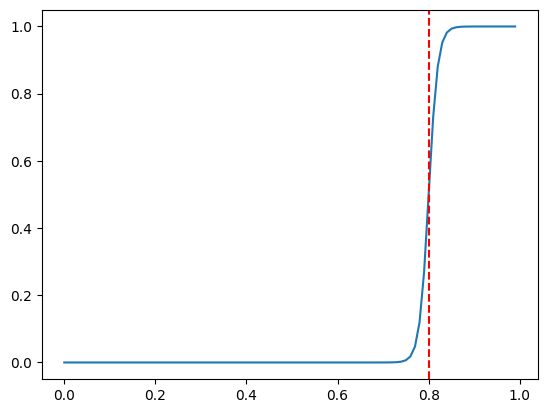

In [3]:
import math

steepness_param = 100
midpoint_curve = 0.8
# plot logistic function
# success_ratio = 1 / (1 + math.exp(-steepness_param * (x - midpoint_curve)))

def f(x):
    return 1 / (1 + math.exp(-steepness_param * (x - midpoint_curve)))

datay = [ f(x) for x in np.arange(0, 1, 0.01)]
datax = [ x for x in np.arange(0, 1, 0.01)]

plt.ion()
plt.plot(datax, datay)
# make a vertical line in the plot
plt.axvline(x=midpoint_curve, color='r', linestyle='--')
plt.show()


In [4]:
# load data from results.out
def get_loaded_data(file_name):
    results = {}
    with open(file_name, "r") as f:
        current_file = ""
        iteration_count = -1
        for line in f:

            if "Solving file:" in line:
                current_file = line.split(" ")[-1].strip()
                results[current_file] = {"solution": [], "iterations": []}
                continue

            if "Iteration" in line:
                results[current_file]["iterations"].append({"fitness": 0, "success_rate": 0.0})
                iteration_count += 1
                continue

            if "The best fitness" in line:
                results[current_file]["iterations"][iteration_count]["fitness"] = float(line.split(":")[-1])
                continue

            if "configuration success rate" in line:
                results[current_file]["iterations"][iteration_count]["success_rate"] = float(line.split(":")[-1].strip())
                continue

            if "Solution" in line:
                results[current_file]["solution"] = line.split(":")[-1]
                iteration_count = -1
                continue
    return results

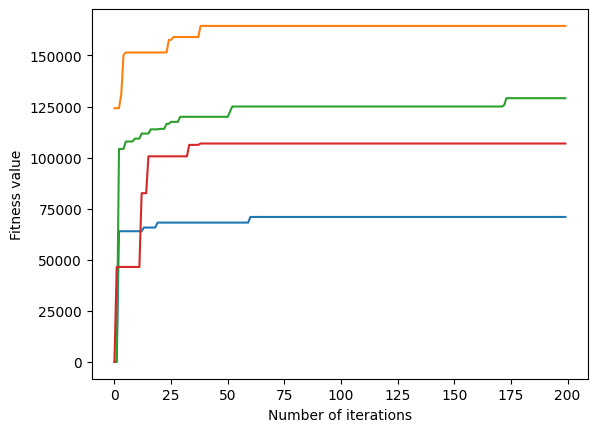

In [5]:
# generate graphs where all our fitness values and success_rates are lines in graph

results = get_loaded_data("results/boosted_example.out")
for file in list(results.keys())[:4]:
    fitness_line = []
    success_rate_line = []

    for result in results[file]["iterations"]:
        fitness_line.append(result["fitness"])
    # plt.ion()
    plt.plot(fitness_line)

plt.ylabel("Fitness value")
plt.xlabel("Number of iterations")
# plt.legend(list(results.keys())[0:20])
plt.show()

# 'Dobre' napady na "experimenty"

- jedno nastavenie spustime viackrat, aby sme porovnali rozsah nahodnosti
- porovnanie kazdej metody (selekcia, krizenie, fitness, atd.) nad jednym reprezentativnym suborom. Kazda metoda sa spusti niekolkokrat a vypocitame priemer. Vysledky dame do jedneho grafu
- porovnanie 3-4 roznych nastaveni genetickeho algoritmu (kombinacia roznych metod dokopy) nad viacerymi (5-10) subormi. Kazde sa spusti viackrat a vytvorime tak niekolko (5-10) grafov, v kazdom porovname priemerne vysledky daneho nastavenia.
- program spustime nad (asi) vsetkymi instanciami a porovname, ci nasiel pre vsetky riesenia


In [6]:
# define one specific build
def build1():
    return GeneticAlgorithm(population_size=50, reproduction_count=30, new_blood=20, elitism=True, survivors=5, max_iterations=100) \
        .set_initial_population_method(RandomInitialPopulation()) \
        .set_fitness_function(SuccessRateFitnessFunction(strict_satisfiability=True)) \
        .set_selection_method(RouletteSelection()) \
        .set_crossover_method(SinglePointCrossover()) \
        .set_mutation_method(BitFlipMutation(mutation_chance=0.01))

In [16]:
# define one specific build
def build2():
    return GeneticAlgorithm(population_size=50, reproduction_count=30, new_blood=20, elitism=True, survivors=5, max_iterations=100) \
        .set_initial_population_method(RandomInitialPopulation()) \
        .set_fitness_function(SuccessRateFitnessFunction(strict_satisfiability=False)) \
        .set_selection_method(RouletteSelection()) \
        .set_crossover_method(SinglePointCrossover()) \
        .set_mutation_method(BitFlipMutation(mutation_chance=0.01))

In [15]:
# define one specific build
def build3():
    return GeneticAlgorithm(population_size=50, reproduction_count=30, new_blood=20, elitism=True, survivors=5, max_iterations=100) \
        .set_initial_population_method(RandomInitialPopulation()) \
        .set_fitness_function(PunishedSuccessRateFitnessFunction(strict_satisfiability=False)) \
        .set_selection_method(RouletteSelection()) \
        .set_crossover_method(SinglePointCrossover()) \
        .set_mutation_method(BitFlipMutation(mutation_chance=0.01))

In [9]:
# define one specific build
def build4():
    return GeneticAlgorithm(population_size=100, reproduction_count=50, new_blood=70, elitism=False, survivors=10, max_iterations=100) \
        .set_initial_population_method(RandomInitialPopulation()) \
        .set_fitness_function(SuccessRateFitnessFunction(strict_satisfiability=True)) \
        .set_selection_method(RouletteSelection()) \
        .set_crossover_method(SinglePointCrossover()) \
        .set_mutation_method(BitFlipMutation(mutation_chance=0.01))

In [10]:
def find_solution(filename, build):
    formula = Formula(filename)
    # create evolution algorithm
    evolution_algorithm = build()
    solution = evolution_algorithm.solve(formula)

    print("Solution:", solution)
    print("Weight:", formula.get_total_weight(solution))

In [11]:
filename = "data/wuf20-71-M/wuf20-01.mwcnf"
find_solution(filename, build1)

Iteration: 0
The best fitness: 0
The best configuration success rate: 0.8450704225352113
Iteration: 1
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 2
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 3
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 4
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 5
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 6
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 7
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 8
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 9
The best fitness: 53463
The best configuration success rate: 1.0
Iteration: 10
The best fitness: 58721
The best configuration success rate: 1.0
Iteration: 11
The best fitness: 58721
The best configuration success rate: 1.0
Iteration: 12
The best fitness: 58721
The best conf

In [12]:
filename = "data/wuf20-71-M/wuf20-01.mwcnf"
find_solution(filename, build2)

Iteration: 0
The best fitness: 53982
The best configuration success rate: 0.9859154929577465
Iteration: 1
The best fitness: 60738
The best configuration success rate: 0.971830985915493
Iteration: 2
The best fitness: 60738
The best configuration success rate: 0.971830985915493
Iteration: 3
The best fitness: 60738
The best configuration success rate: 0.971830985915493
Iteration: 4
The best fitness: 62781
The best configuration success rate: 0.971830985915493
Iteration: 5
The best fitness: 64541
The best configuration success rate: 1.0
Iteration: 6
The best fitness: 64541
The best configuration success rate: 1.0
Iteration: 7
The best fitness: 66071
The best configuration success rate: 1.0
Iteration: 8
The best fitness: 66071
The best configuration success rate: 1.0
Iteration: 9
The best fitness: 66071
The best configuration success rate: 1.0
Iteration: 10
The best fitness: 66071
The best configuration success rate: 1.0
Iteration: 11
The best fitness: 66071
The best configuration success r

In [17]:
filename = "data/wuf20-71-M/wuf20-01.mwcnf"
find_solution(filename, build3)

Iteration: 0
The best fitness: 57035
The best configuration success rate: 0.9014084507042254
Iteration: 1
The best fitness: 57035
The best configuration success rate: 0.9014084507042254
Iteration: 2
The best fitness: 57035
The best configuration success rate: 0.9014084507042254
Iteration: 3
The best fitness: 57136
The best configuration success rate: 0.8873239436619719
Iteration: 4
The best fitness: 57136
The best configuration success rate: 0.8873239436619719
Iteration: 5
The best fitness: 57136
The best configuration success rate: 0.8873239436619719
Iteration: 6
The best fitness: 63399
The best configuration success rate: 1.0
Iteration: 7
The best fitness: 65045
The best configuration success rate: 0.971830985915493
Iteration: 8
The best fitness: 65045
The best configuration success rate: 0.971830985915493
Iteration: 9
The best fitness: 65045
The best configuration success rate: 0.971830985915493
Iteration: 10
The best fitness: 65045
The best configuration success rate: 0.97183098591

In [13]:
filename = "data/wuf100-430-Q/wuf100-01.mwcnf"
find_solution(filename, build1)

Iteration: 0
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 1
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 2
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 3
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 4
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 5
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 6
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 7
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 8
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 9
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 10
The best fitness: 0
The best configuration success rate: 0.8790697674418605
Iteration: 11
The be